<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Introduction" data-toc-modified-id="Introduction-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Introduction</a></span></li><li><span><a href="#The-Model" data-toc-modified-id="The-Model-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>The Model</a></span><ul class="toc-item"><li><span><a href="#Questions" data-toc-modified-id="Questions-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Questions</a></span></li><li><span><a href="#Assignment-1:-Linear-Algebra,-yay." data-toc-modified-id="Assignment-1:-Linear-Algebra,-yay.-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Assignment 1: Linear Algebra, yay.</a></span></li></ul></li><li><span><a href="#Matrices-in-numpy" data-toc-modified-id="Matrices-in-numpy-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Matrices in numpy</a></span><ul class="toc-item"><li><span><a href="#Matrix-multiplication" data-toc-modified-id="Matrix-multiplication-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Matrix multiplication</a></span><ul class="toc-item"><li><span><a href="#Question:-Try-to-use-*-instead-of-@" data-toc-modified-id="Question:-Try-to-use-*-instead-of-@-3.1.1"><span class="toc-item-num">3.1.1&nbsp;&nbsp;</span>Question: Try to use <code>*</code> instead of <code>@</code></a></span></li></ul></li></ul></li><li><span><a href="#A-small-detour:-Sympy" data-toc-modified-id="A-small-detour:-Sympy-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>A small detour: Sympy</a></span><ul class="toc-item"><li><span><a href="#Assignment:-AR(2)-Simulation" data-toc-modified-id="Assignment:-AR(2)-Simulation-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Assignment: AR(2) Simulation</a></span></li><li><span><a href="#Assignment-2:-Linking-Math-and-Economics" data-toc-modified-id="Assignment-2:-Linking-Math-and-Economics-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>Assignment 2: Linking Math and Economics</a></span></li><li><span><a href="#Assignment-3:-Recover-$a$-and-$b$." data-toc-modified-id="Assignment-3:-Recover-$a$-and-$b$.-4.3"><span class="toc-item-num">4.3&nbsp;&nbsp;</span>Assignment 3: Recover $a$ and $b$.</a></span></li><li><span><a href="#Assignment-4:-Another-matrix" data-toc-modified-id="Assignment-4:-Another-matrix-4.4"><span class="toc-item-num">4.4&nbsp;&nbsp;</span>Assignment 4: Another matrix</a></span><ul class="toc-item"><li><span><a href="#Solution:" data-toc-modified-id="Solution:-4.4.1"><span class="toc-item-num">4.4.1&nbsp;&nbsp;</span>Solution:</a></span></li></ul></li></ul></li><li><span><a href="#Simulating-the-entire-system" data-toc-modified-id="Simulating-the-entire-system-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Simulating the entire system</a></span></li><li><span><a href="#Adding-random-noise" data-toc-modified-id="Adding-random-noise-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Adding random noise</a></span><ul class="toc-item"><li><ul class="toc-item"><li><span><a href="#Wrap-everything-into-a-function" data-toc-modified-id="Wrap-everything-into-a-function-6.0.1"><span class="toc-item-num">6.0.1&nbsp;&nbsp;</span>Wrap everything into a function</a></span></li></ul></li><li><span><a href="#Different-Values-of-a-and-b" data-toc-modified-id="Different-Values-of-a-and-b-6.1"><span class="toc-item-num">6.1&nbsp;&nbsp;</span>Different Values of a and b</a></span><ul class="toc-item"><li><span><a href="#Explosive-Oscillations" data-toc-modified-id="Explosive-Oscillations-6.1.1"><span class="toc-item-num">6.1.1&nbsp;&nbsp;</span>Explosive Oscillations</a></span></li><li><span><a href="#Exponential-Blowup" data-toc-modified-id="Exponential-Blowup-6.1.2"><span class="toc-item-num">6.1.2&nbsp;&nbsp;</span>Exponential Blowup</a></span></li><li><span><a href="#Smooth-Convergence" data-toc-modified-id="Smooth-Convergence-6.1.3"><span class="toc-item-num">6.1.3&nbsp;&nbsp;</span>Smooth Convergence</a></span></li></ul></li></ul></li><li><span><a href="#What-if-there-is-no-Accelerator?" data-toc-modified-id="What-if-there-is-no-Accelerator?-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>What if there is no Accelerator?</a></span></li></ul></div>

# Introduction

In this notebook we finally turn out attention to the Samuelson Multiplier-Accelerator. We will combine many of the things we've already seen, including loops, arrays, and plotting. We'll also look at what a 2d array (a matrix) looks like, and see how to do linear algebra in Python.

As always, we begin with some imports.

In [1]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt

# The Model

Let's assume that

* $\{G_t\}$ is a sequence of levels of government expenditures --
  we'll start by setting $G_t = G$ for all $t$.
* $\{C_t\}$ is a sequence of levels of aggregate consumption
  expenditures, a key endogenous variable in the model.
* $\{I_t\}$ is a sequence of rates of investment, another key
  endogenous variable.
* $\{Y_t\}$ is a sequence of levels of national income, yet
  another endogenous variable.

- $a$ is the marginal propensity to consume in the Keynesian
  consumption function $C_t = a Y_{t-1} + \gamma$.
- $b$ is the "accelerator coefficient" in the "investment
  accelerator" $I_t = b (Y_{t-1} - Y_{t-2})$.
- $\{\epsilon_{t}\}$ is an IID sequence standard normal random variables.
- $\sigma \geq 0$ is a "volatility"
  parameter --- setting $\sigma = 0$ recovers the non-stochastic case
  that we'll start with.

The model combines the consumption function

$$
C_t = a Y_{t-1} + \gamma
$$

with the investment accelerator

$$
I_t = b (Y_{t-1} - Y_{t-2})
$$

and the national income identity

$$
Y_t = C_t + I_t + G_t
$$

- The parameter $a$ is peoples' *marginal propensity to consume*
  out of income - equation for $C_t$ asserts that people consume a fraction of
  $a \in (0,1)$ of each additional dollar of income.
- The parameter $b > 0$ is the investment accelerator coefficient - equation
  for $I_t$ asserts that people invest in physical capital when
  income is increasing and disinvest when it is decreasing.

Equations for $C_t$, $I_t$, and $Y_t$ imply the following second-order linear difference equation for national income:

$$
Y_t = (a+b) Y_{t-1} - b Y_{t-2} + (\gamma + G_t)
$$

or

$$
Y_t = \rho_1 Y_{t-1} + \rho_2 Y_{t-2} + (\gamma + G_t)
$$

where $\rho_1 = (a+b)$ and $\rho_2 = -b$.

To complete the model, we require two **initial conditions**.

If the model is to generate time series for $t=0, \ldots, T$, we
require initial values

$$
Y_{-1} = \bar Y_{-1}, \quad  Y_{-2} = \bar Y_{-2}
$$


## Questions

1. After making all the substitutions, what are the parameters of the model?
2. What are the endogenous variables?
3. Are there any identification problems for $\rho_1$ and $\rho_2$?
4. If we estimate $\rho_1$ and $\rho_2$, would it be possible to recover $a$ and $b$?

## Assignment 1: Linear Algebra, yay.

The "state" of this linear system is given by:

$$x_t = \begin{bmatrix} Y_{t-1} \\ Y_{t-2} \end{bmatrix}$$

Given this, write the equation $Y_t = \rho_1 Y_{t-1} + \rho_2 Y_{t-2} + (\gamma + G_t)$ as a matrix equation of the form:

$$x_{t+1} = Ax_t + d$$

Solution:

$$A = \begin{bmatrix} \rho_1 & \rho_2 \\ 1 & 0 \end{bmatrix}$$
$$d = \begin{bmatrix} \gamma + \bar G \\ 0 \end{bmatrix}$$

# Matrices in numpy

A matrix in numpy is represented as a vector of lists of lists.

That wasn't clear at all. Let's look at some examples.

In [2]:
EYE = np.array([[1, 0],
                [0, 1]])

print(EYE.shape)

(2, 2)


In [3]:
x = np.array([[1.0],
              [2.0]])

x.shape

(2, 1)

## Matrix multiplication

Matrix multiplicaion is represented with the `@` sign.

In [4]:
EYE @ x

array([[1.],
       [2.]])

The other way doesn't work -- why?

In [5]:
x @ EYE

ValueError: matmul: Input operand 1 has a mismatch in its core dimension 0, with gufunc signature (n?,k),(k,m?)->(n?,m?) (size 2 is different from 1)

### Question: Try to use `*` instead of `@`

Explain the result.

In [6]:
### Your code here

# A small detour: Sympy

Sympy is a package for doing symbolic algebra in Python. It's the equivalent of something like WolframAlpha, Mathematica, or Maple.

In [7]:
import sympy as sp
a, b, γ, G, λ = sp.symbols(list('abγGλ')) 
ρ1, ρ2 = sp.symbols(['ρ_1', 'ρ_2'])
y, y1, y2 = sp.symbols(['Y_t', 'Y_{t-1}', 'Y_{t-2}'])
# ρ1 = a + b
# ρ2 = -b

A = sp.Matrix([[ρ1, ρ2],
               [1, 0]])
x = sp.Matrix([[y1],
               [y2]])
Y = sp.Matrix([[y],
               [y1]])

In [8]:
sp.Eq(Y, sp.MatMul(A, x, evaluate=False))

Eq(Matrix([
[    Y_t],
[Y_{t-1}]]), Matrix([
[ρ_1, ρ_2],
[  1,   0]])*Matrix([
[Y_{t-1}],
[Y_{t-2}]]))

As you can see, our matrix form is correct. We recover the equation $Y_t = \rho_1 Y_{t-1} + \rho_2 Y_{t-2}$, and shift $Y_{t-1}$ into the position previously held by $Y_{t-2}$, carrying along all the information we need to do the loop again.

In [9]:
sp.Eq(Y, sp.MatMul(A, x, evaluate=True))

Eq(Matrix([
[    Y_t],
[Y_{t-1}]]), Matrix([
[Y_{t-1}*ρ_1 + Y_{t-2}*ρ_2],
[                  Y_{t-1}]]))

An important characteristic of linear systems of equations (that's what a matrix is) are the values that make it 0. These are called roots. It turns out that the roots of a system the same as it's eigenvalues.

We can think of matrices as actions on an n-dimensional space. A matrix can spin the space, shift the space, or shear the space. These actions move all points (vectors) to a new point. Usually, this means the vectors get knocked off their **span**, the line that is implied by the vector by stretching it forever in all directions. But some special vectors *don't* get knocked off their span. The only get stretched, remaining in the same subspace. In a sense, they remain *stationary*, while everythingn else around them changes.

These special vectors are called **eigenvectors**. The factor by which the matrix stretches them, without knocking them off their span, is called their **eigenvalues**.

In algebra, what we seek is a vector $x$ that, when acted on by a matrix $A$, remains $x$, but scaled by an unknown factor $\lambda$. Or:

$$A = \lambda x$$

Gather the $x$'s:

$$(A - I\lambda)x = 0$$

I slipped an $I$ in there to make the shapes work out more nicely. 

Obviously this equation is true when $x=0$, but that's a boring solution and we don't care. We need another solution, $A - I\lambda = 0$. To proceed, you need to know that the determinant of a matrix is a measure of the amount of volume created or lost by applying the transformation that matrix represents. For example, the determinant of the identity matrix is 1, because the transformation implied by identity matrix (do nothing) has no effect on the volume of the space. On the other hand, the determinant of the zero vector is zero, because it crushes all space into a singularity at the origin, annhilating all volume.

So you might now be able to guess, we need to choose $\lambda$ such that $\det \left [ A - I\lambda \right ] = 0$. Sympy can help us work through this.

In [10]:
char_poly = sp.det(A - sp.eye(2) * λ)
char_poly

λ**2 - λ*ρ_1 - ρ_2

In [11]:
roots = sp.solve(char_poly, λ)
roots

[ρ_1/2 - sqrt(ρ_1**2 + 4*ρ_2)/2, ρ_1/2 + sqrt(ρ_1**2 + 4*ρ_2)/2]

In [12]:
for root in roots:
    display(root)

ρ_1/2 - sqrt(ρ_1**2 + 4*ρ_2)/2

ρ_1/2 + sqrt(ρ_1**2 + 4*ρ_2)/2

Sympy can also transform symbolic expressions into python code that we can use with numpy. We do this using the `sp.lambdify` function.

In [13]:
f_rho1 = sp.lambdify([ρ1, ρ2], roots[0])
f_rho2 = sp.lambdify([ρ1, ρ2], roots[1])

When we looked at the AR(1) equation:

$$Y_t = \rho Y_{t-1}$$

It was intuitively clear that the condition for this to be stationary (i.e., to not blow up to +/- $\infty$, was $|\rho| < 1$. If you're not convinced, run some simulations.

For an AR(2), like this model, it's not intuitively clear at all what is going on, but I will tell you that the stability condition is that **all** eigenvalues lie "within the unit circle on the complex plane". This is a fancy way of saying that the modulus of the eigenvalue is less than 1, which is also a fancy way of saying something, but I'm not sure what. Let's plot some values and hopefully a picture will emerge.

In [14]:
# Get 500 numbers evenly spaced between -5 and 5, and tell python they are going to hold complex values
rho1_values = np.linspace(-5, 5, 500, dtype='complex128')
rho2_values = np.linspace(-5, 5, 500, dtype='complex128')


# Take the cartesian production of these 500 points to get a 500 x 500 grid of points
rho1_grid, rho2_grid = np.meshgrid(rho1_values, rho2_values)

# Compute the two eigenvalues for each point in the grid
eig1 = f_rho1(rho1_grid, rho2_grid)
eig2 = f_rho2(rho1_grid, rho2_grid)

Quick note about logical operators in Python. To check if two numbers are the same, use `==`. This return `True` or `False`. `&` mean `and`, while `|` means `or`. Then you have the following logical table:

```
True & True = True
True & False = False
False & False = False
True | True = True
True | False = True
False | False = False
```

I use these to find parameter value pairs associated with eigenvalues that are either real or imaginary, and both less than 1 in modulus.

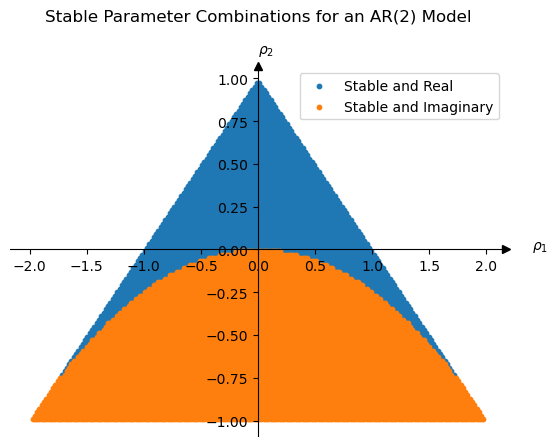

In [15]:
both_real = (eig1.imag == 0) & (eig2.imag == 0)
both_imag = (eig1.imag != 0) & (eig2.imag != 0) 
both_le_one = (np.abs(eig1) < 1) & (np.abs(eig2) < 1)

real_and_stable = np.where(both_real & both_le_one)

fig, ax = plt.subplots()
ax.scatter(rho1_grid[real_and_stable].real, 
           rho2_grid[real_and_stable].real,
           label = 'Stable and Real',
           s=10)

imag_and_stable = np.where(both_imag & both_le_one)

ax.scatter(rho1_grid[imag_and_stable].real, 
           rho2_grid[imag_and_stable].real,
           label='Stable and Imaginary',
           s=10)

ax.spines[["left", "bottom"]].set_position(("data", 0))
ax.spines[["top", "right"]].set_visible(False)

ax.plot(1, 0, ">k", transform=ax.get_yaxis_transform(), clip_on=False)
ax.text(x=2.4, y=0, s=r'$\rho_1$')
ax.plot(0, 1, "^k", transform=ax.get_xaxis_transform(), clip_on=False)
ax.text(x=0, y=1.15, s=r'$\rho_2$')

ax.set_title('Stable Parameter Combinations for an AR(2) Model', y=1.1)

ax.legend()
plt.show()


## Assignment: AR(2) Simulation

Pick three pairs of values from the plot above: one in the blue region, one in the orange region, and one in the white region. For each pair, simulate a trajectory from the equation:

$$x_{t+1} = \rho_1 x_t + \rho_2 x_{t-1} + \epsilon_{t+1}$$

Where $\epsilon_{t+1} \sim N(0,1)$

Simulate for 100 timesteps, then plot the results.

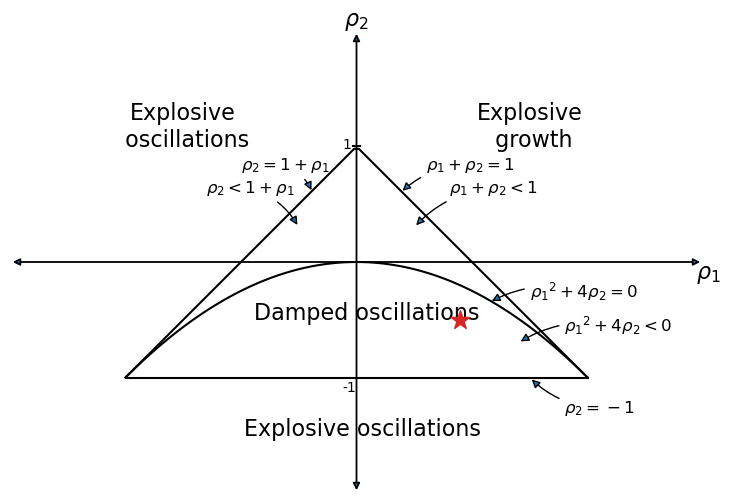

In [16]:
from utilities import quantecon_param_plot
fig, ax = quantecon_param_plot()

ρ1 = 0.9
ρ2 = -0.5

ax.scatter(ρ1, ρ2, marker='*', color='tab:red', s=200, zorder=10)
plt.show()

In [ ]:
T = 100
x0 = 0
x1 = 0

rng = np.random.default_rng(77777)

rho_pairs = # make a list of 3 lists, each with 2 numbers: ρ1, ρ2

fig, ax = plt.subplots()

for rhos in rho_pairs:
    ρ1, ρ2 = rhos #python can "unpack" a list of 2 numbers directly into 2 variables for you
    x_history = #use np.empty
    # Don't forget to make x[0] = x0, and x[1] = x1
    
    for t in range(1, T - 2): #start at timestep 1, because we need 2 lags to compute x[2]
        #update x[t+1] using the equation. Don't forget a normal draw
    
    #add the trajectory to the plot with ax.plot. Add a label to say what is ρ1, ρ2


plt.show()

## Assignment 2: Linking Math and Economics

What was Samuelson's goal in writing this model? What parameter values make sense for him? Why?

## Assignment 3: Recover $a$ and $b$.

Pick a pair of parameters $\rho_1$ and $\rho_2$ from the eigenvalue plot that would make sense in Samuelson's model. Use the definitions of $\rho_1$ and $\rho_2$ to recover the values of $a$ and $b$.

## Assignment 4: Another matrix

The matrix multiplication $x_{t+1} = Ax_t$ takes the state vector from time $t$ to time $t+1$. But we are also interested in what happens to $C$ and $I$.

Call the vector $y_t = \begin{bmatrix} C_t \\ I_t \\ G_t \end{bmatrix}$ the **observation vector**.

Find a matrix $Z$ (and potentially a additional constant vector $c$) that transforms the state vector at time $t$, $x_t$, into the observation vector at time $t$.

### Solution:

$$ Z = \begin{bmatrix} a,    &  0 \\
                       b     & -b \\
                       0     &  0 \end{bmatrix}$$
                       
$$c = \begin{bmatrix} 0 \\ 0 \\ \bar{G} \end{bmatrix}$$

In [18]:
C, I, G, a, b, γ = sp.symbols(list('CIGabγ'))
G_bar = sp.Symbol(r'\bar{G}')

x = sp.Matrix([[y1, y2]]).reshape(2, 1)
y = sp.Matrix([[C, I, G]]).reshape(3, 1)
A = sp.Matrix([[a + b, -b],
               [1, 0]])
Z = sp.Matrix([[a, 0],
               [b, -b],
               [0, 0]])

d = sp.Matrix([γ + G_bar, 0]).reshape(2, 1)
c = sp.Matrix([γ, 0, G_bar]).reshape(3, 1)

In [19]:
A @ x + d

Matrix([
[Y_{t-1}*(a + b) - Y_{t-2}*b + \bar{G} + γ],
[                                  Y_{t-1}]])

In [20]:
Z @ x + c

Matrix([
[        Y_{t-1}*a + γ],
[Y_{t-1}*b - Y_{t-2}*b],
[              \bar{G}]])

# Simulating the entire system

With the matrices $A$ and $Z$, along with vectors $c$ and $d$, we can simulate the entire system. We need to:

1. Choose values for $a$, $b$, $\gamma$, and $\bar G$.
2. Choose an initial state vector $x_0 = \begin{bmatrix} Y_{-1} \\ Y_{-2} \end{bmatrix}$.
3. Choose a simulation length.
4. At each timestep in the simulation length, compute `x[t + 1] = A @ x[t] + d` and  `y[t] = Z @ x[t] + c`.

In [21]:
parameters = [a, b, γ, G_bar]
make_A = sp.lambdify(parameters, A)
make_Z = sp.lambdify(parameters, Z)
make_d = sp.lambdify(parameters, d)
make_c = sp.lambdify(parameters, c)

In [22]:
T = 100
n_states = 2
n_observed = 3

a = 0.8
b = 0.9
γ = 10
G_bar = 10

x0 = np.array([100.0, 50.0])

A = make_A(a, b, γ, G_bar)
Z = make_Z(a, b, γ, G_bar)
c = make_c(a, b, γ, G_bar)
d = make_d(a, b, γ, G_bar)

x = np.empty(shape=(T, n_states, 1))
y = np.empty(shape=(T, n_observed, 1))

x[0] = x0.reshape(-1, 1)

for t in range(T - 1):
    x[t+1] = A @ x[t] + d
    y[t] = Z @ x[t] + c
y[t+1] = Z @ x[t+1] + c

In [23]:
from utilities import quantecon_param_plot
def plot_a_b(a, b):
    fig, ax = quantecon_param_plot()
    
    ρ1 = a + b
    ρ2 = -b
    
    ax.scatter(ρ1, ρ2, marker='*', color='tab:red', s=200, zorder=10, label=r'Chosen parameters, $(\rho_1, \rho_2)$')
    ax.legend()
    plt.show()

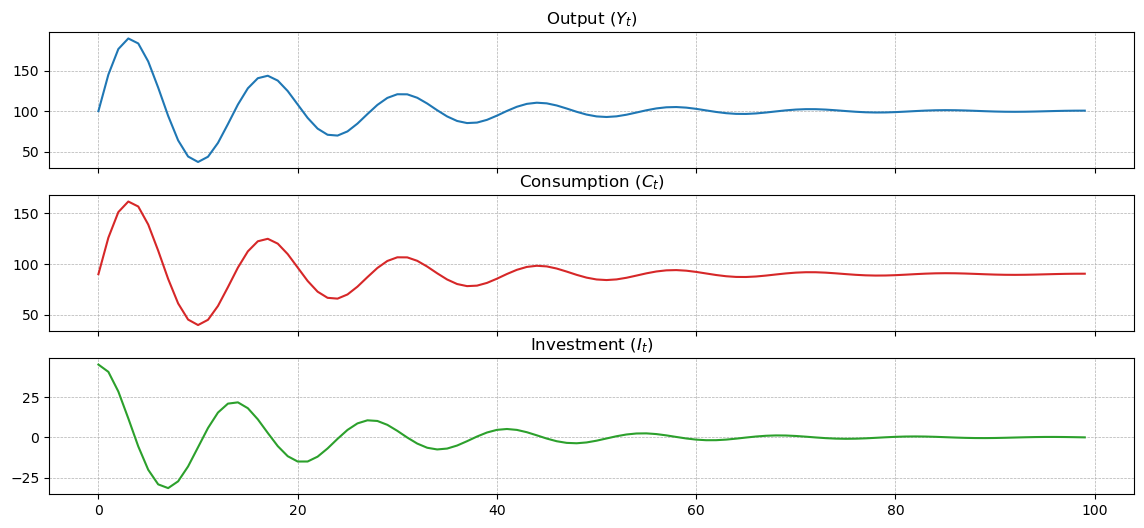

In [24]:
def plot_samuelson_model(x, y, ax=None, alpha=1):
    if ax is None:
        fig, ax = plt.subplots(3, 1, figsize=(14,6), dpi=100, sharex=True)

    ax[0].plot(x[:, 0, 0], color='tab:blue', alpha=alpha)
    ax[0].set_title('Output ($Y_t$)')
    ax[0].grid(ls='--', lw=0.5)

    ax[1].plot(y[:, 0, 0], color='tab:red', alpha=alpha)
    ax[1].set_title('Consumption ($C_t$)')
    ax[1].grid(ls='--', lw=0.5)

    ax[2].plot(y[:, 1, 0], color='tab:green', alpha=alpha)
    ax[2].set_title('Investment ($I_t$)')
    ax[2].grid(ls='--', lw=0.5)
    
    if ax is None:
        fig.tight_layout()
        plt.show()
    
plot_samuelson_model(x, y)

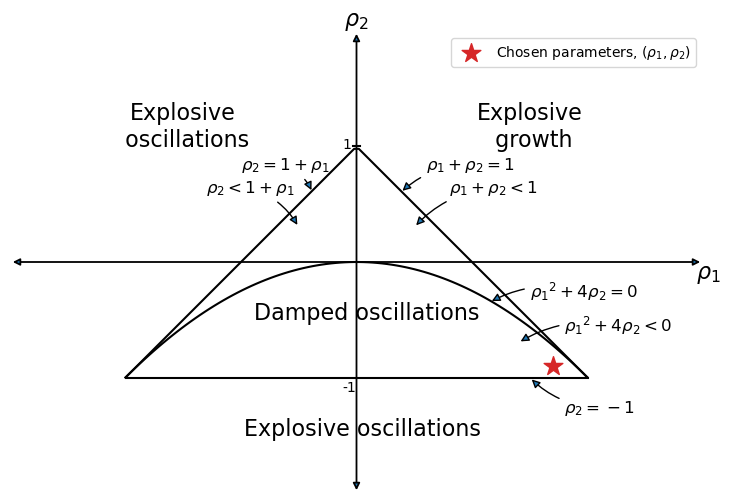

In [25]:
plot_a_b(a, b)

# Adding random noise

We know how to add noise to a model: we sample shocks $\epsilon_{t+1} \sim N(0, \sigma)$, and add it into the state equation.

We can introduce a new matrix $R$ that will map shocks to the appropriate state equations. In our case, we have 2 state equations, and noise should only go in the 1st one, so we get $Y_t = \rho_1 Y_{t-1} + \rho_2 Y_{t-2} + \epsilon_{t+1}$. For the second equation, we still just want to "carry along" $Y_{t-1}$.

With one shock and two states, the shape of R will be 2 x 1, with:

$$ R = \begin{bmatrix}1 \\ 0 \end{bmatrix}$$

Our linear system of equations is now:

$$\begin{align} x_{t+1} &= Ax_t + d + R\epsilon_{t+1} \\
                y_t &= Zx_t + c \end{align}$$

In [26]:
rng = np.random.default_rng(12345)

In [27]:
T = 100
n_states = 2
n_observed = 3

a = 0.8
b = 0.9
γ = 10
G_bar = 10
σ = 20

x0 = np.array([[100.0], 
               [50.0]])

A = make_A(a, b, γ, G_bar)
Z = make_Z(a, b, γ, G_bar)
c = make_c(a, b, γ, G_bar)
d = make_d(a, b, γ, G_bar)

R = np.array([[1.0],
              [0.0]])

x = np.empty(shape=(T, n_states, 1))
y = np.empty(shape=(T, n_observed, 1))

x[0] = x0.reshape(-1, 1)

for t in range(T - 1):
    x[t+1] = A @ x[t] + d + R * rng.normal(scale=σ)
    y[t] = Z @ x[t] + c
y[t+1] = Z @ x[t+1] + c

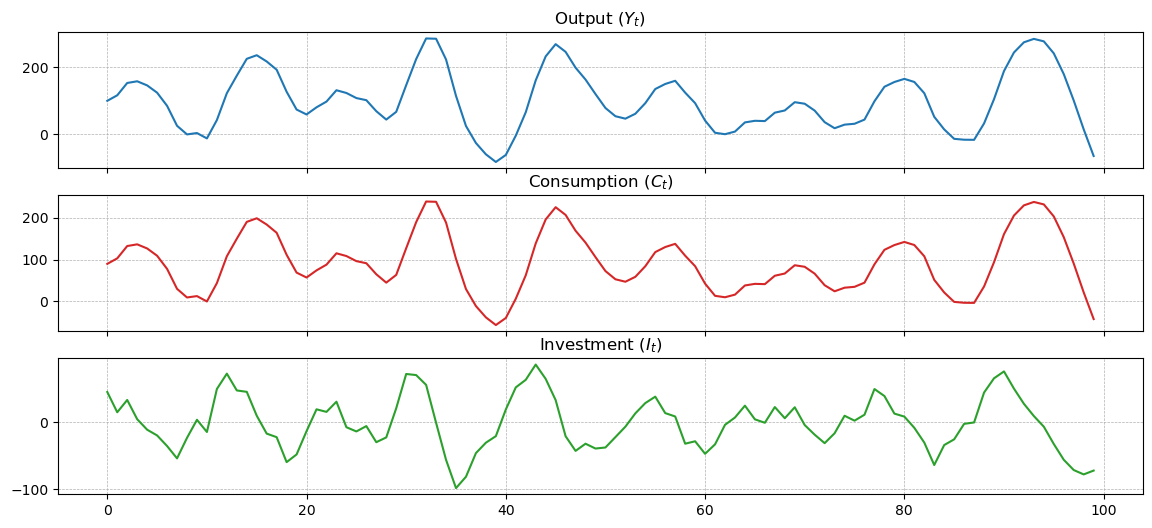

In [28]:
plot_samuelson_model(x, y)

### Wrap everything into a function

In [29]:
def simulate_and_plot_samuelson(a, b, γ, G_bar, σ, x0, T=100, n_simulations=1, plot=True, alpha=1):
    n_states = 2
    n_observed = 3
    A = make_A(a, b, γ, G_bar)
    Z = make_Z(a, b, γ, G_bar)
    c = make_c(a, b, γ, G_bar)
    d = make_d(a, b, γ, G_bar)

    R = np.array([[1.0],
                  [0.0]])
    
    fig, ax = plt.subplots(3, 1, figsize=(14,6), sharex=True)
    for _ in range(n_simulations):
        x = np.empty(shape=(T, n_states, 1))
        y = np.empty(shape=(T, n_observed, 1))

        x[0] = x0.reshape(-1, 1)

        for t in range(T - 1):
            x[t+1] = A @ x[t] + d + R * rng.normal(scale=σ)
            y[t] = Z @ x[t] + c
        y[t+1] = Z @ x[t+1] + c
        plot_samuelson_model(x, y, ax=ax, alpha=alpha)
    fig.tight_layout()
    plt.show()

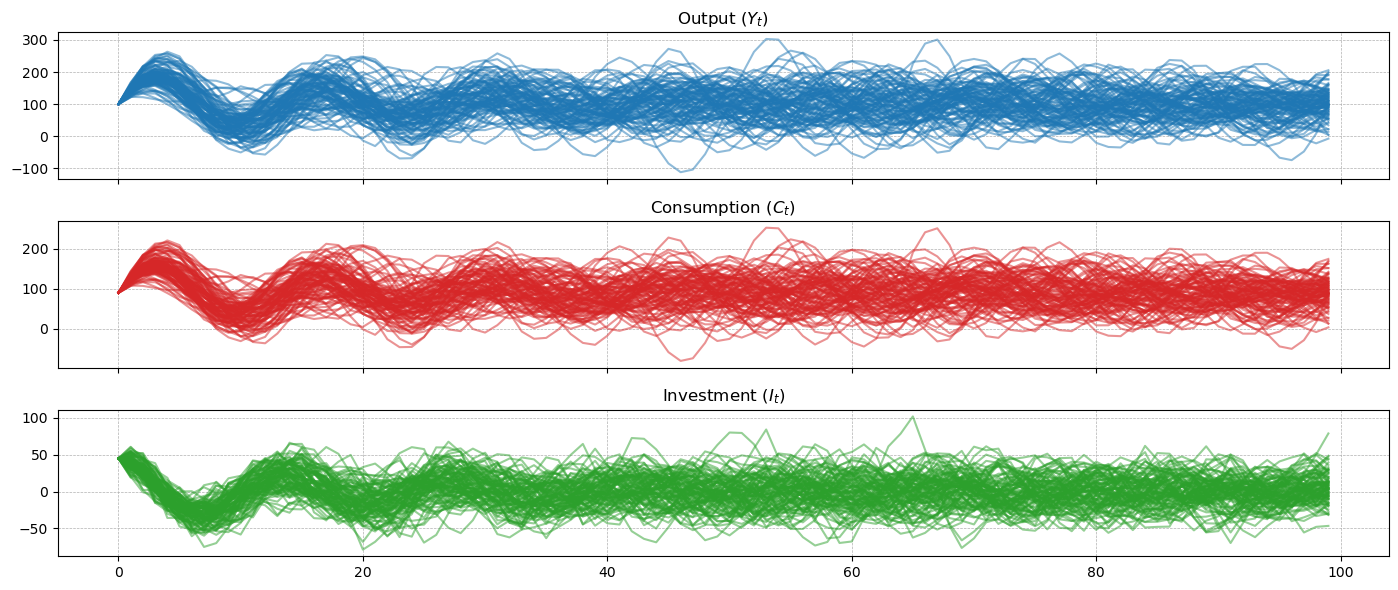

In [30]:
x0 = np.array([100.0, 50.0]).reshape(-1, 1)
simulate_and_plot_samuelson(a=0.8, b=0.9, γ=10, G_bar=10, σ=10, x0=x0, n_simulations=100, alpha=0.5)

## Different Values of a and b

### Explosive Oscillations

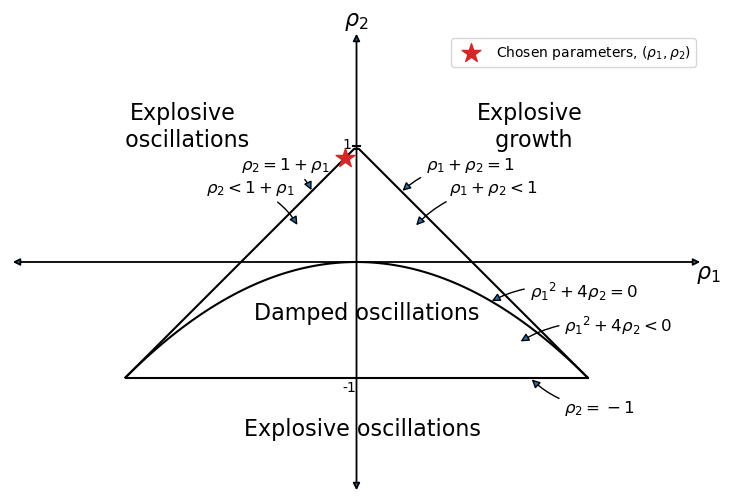

In [31]:
plot_a_b(0.8, -0.9)

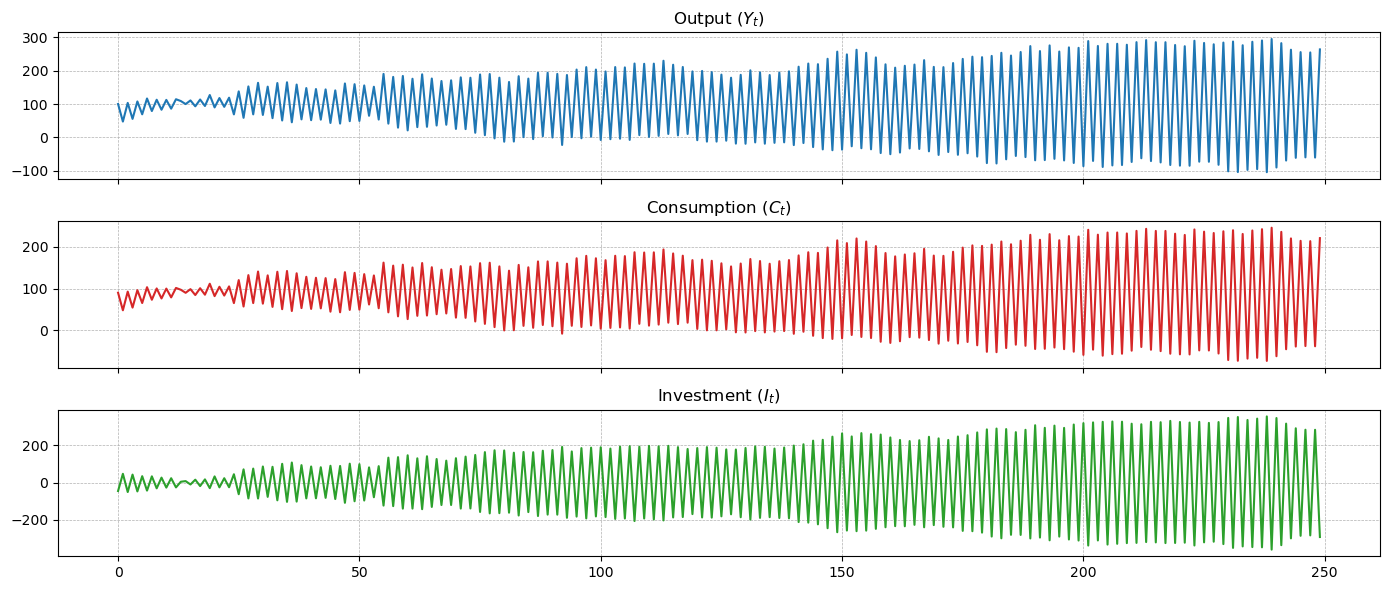

In [32]:
simulate_and_plot_samuelson(a=0.8, b=-0.9, γ=10, G_bar=10, σ=10, x0=x0, n_simulations=1, T=250)

### Exponential Blowup

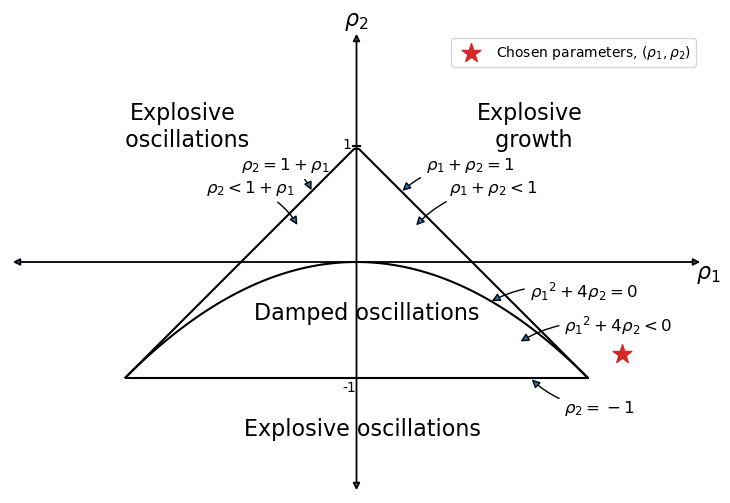

In [33]:
plot_a_b(1.5, 0.8)

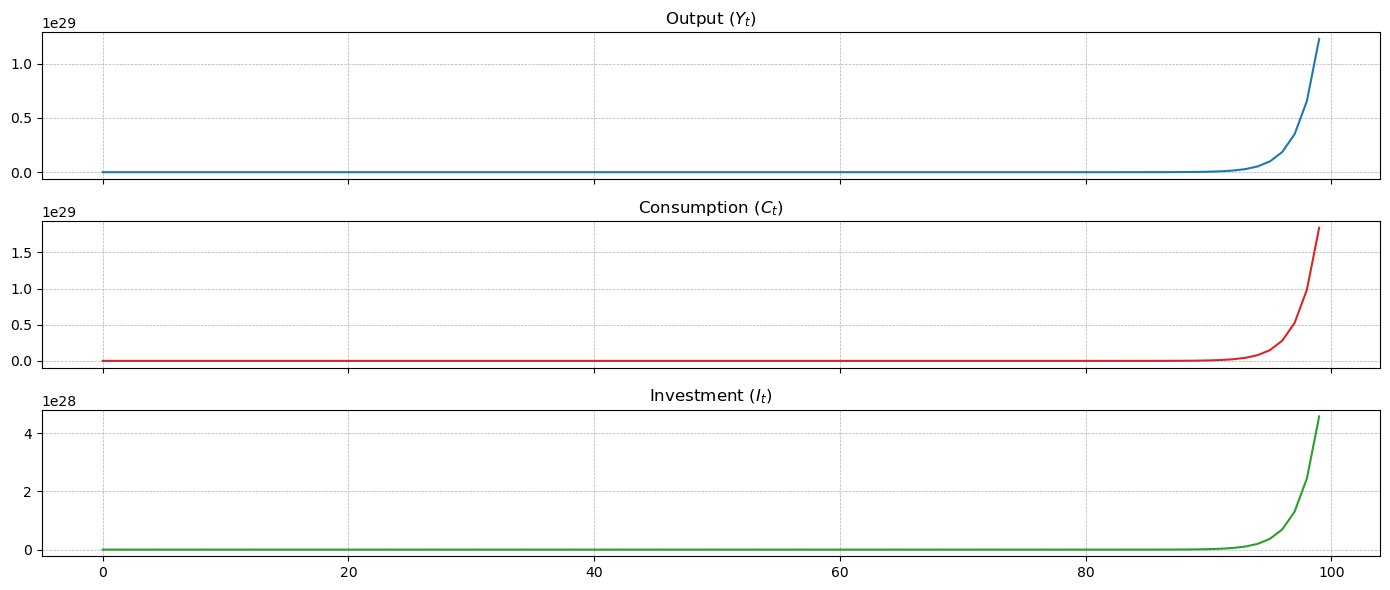

In [34]:
simulate_and_plot_samuelson(a=1.5, b=0.8, γ=10, G_bar=10, σ=10, x0=x0, n_simulations=1)

### Smooth Convergence

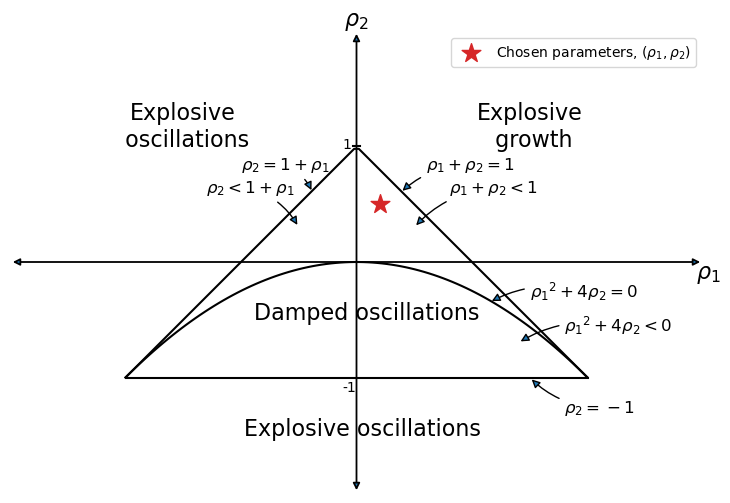

In [35]:
plot_a_b(0.7, -0.5)

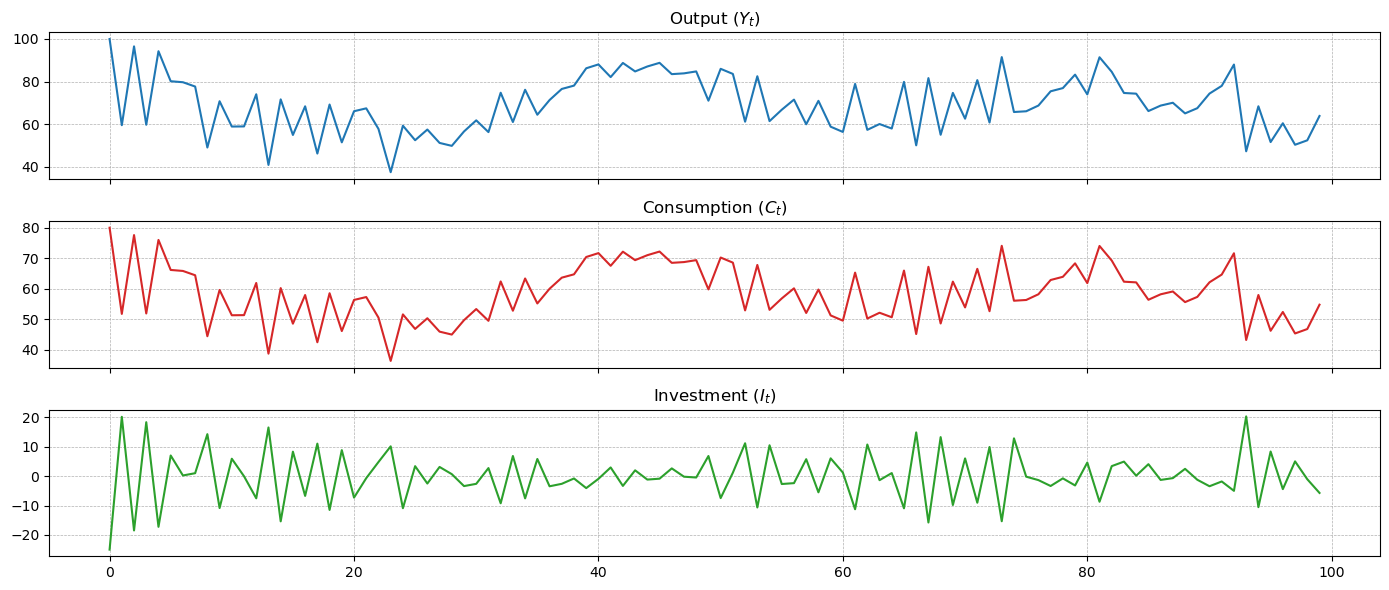

In [36]:
simulate_and_plot_samuelson(a=0.7, b=-0.5, γ=10, G_bar=10, σ=10, x0=x0, n_simulations=1)

# What if there is no Accelerator?

Call the `simulate_and_plot_samuelson` function, turning off the accelerator part of the model (how?). Comment on the dynamics you see, especially when compared to the case when the accelerator is turned on.


In [60]:
## YOUR CODE GOES HERE